In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

data = pd.read_csv('train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Convertir todo a minuscula
data['text'] = data['text'].str.lower()
# Quitar caracteres especiales
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
# Quitar links
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
# Quitar emoticones
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

data['text'] = data['text'].apply(lambda x: emoji_pattern.sub(r'', x))
# Quitar signos de puntuacion
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [4]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

stop = stopwords.words('english')
for i in range(len(data)):
    data.loc[i, 'text'] = ' '.join([word for word in data.loc[i, 'text'].split() if word not in (stop)])

data['text'] = data['text'].apply(lambda x: re.sub(r'\d+', '', x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [6]:
from collections import Counter

# Separar el dataset en tweets de desastres y no desastres
disaster_tweets = data[data['target'] == 1]['text']
non_disaster_tweets = data[data['target'] == 0]['text']

# Obtener la frecuencia de palabras para tweets de desastres
disaster_words = ' '.join(disaster_tweets).split()
disaster_word_freq = Counter(disaster_words)

# Obtener las 20 palabras más comunes en tweets de desastres
disaster_common_words = disaster_word_freq.most_common(20)

In [7]:
non_disaster_words = ' '.join(non_disaster_tweets).split()
non_disaster_word_freq = Counter(non_disaster_words)

# Obtener las 20 palabras más comunes en tweets que no son desastres
non_disaster_common_words = non_disaster_word_freq.most_common(20)

In [8]:
from nltk.util import bigrams
def get_bigram_frequency(texts):
    all_bigrams = []
    for text in texts:
        tweet_bigrams = list(bigrams(text.split()))
        all_bigrams.extend(tweet_bigrams)
    return Counter(all_bigrams)

# Ejemplo de uso:
disaster_bigram_freq = get_bigram_frequency(disaster_tweets)
non_disaster_bigram_freq = get_bigram_frequency(non_disaster_tweets)

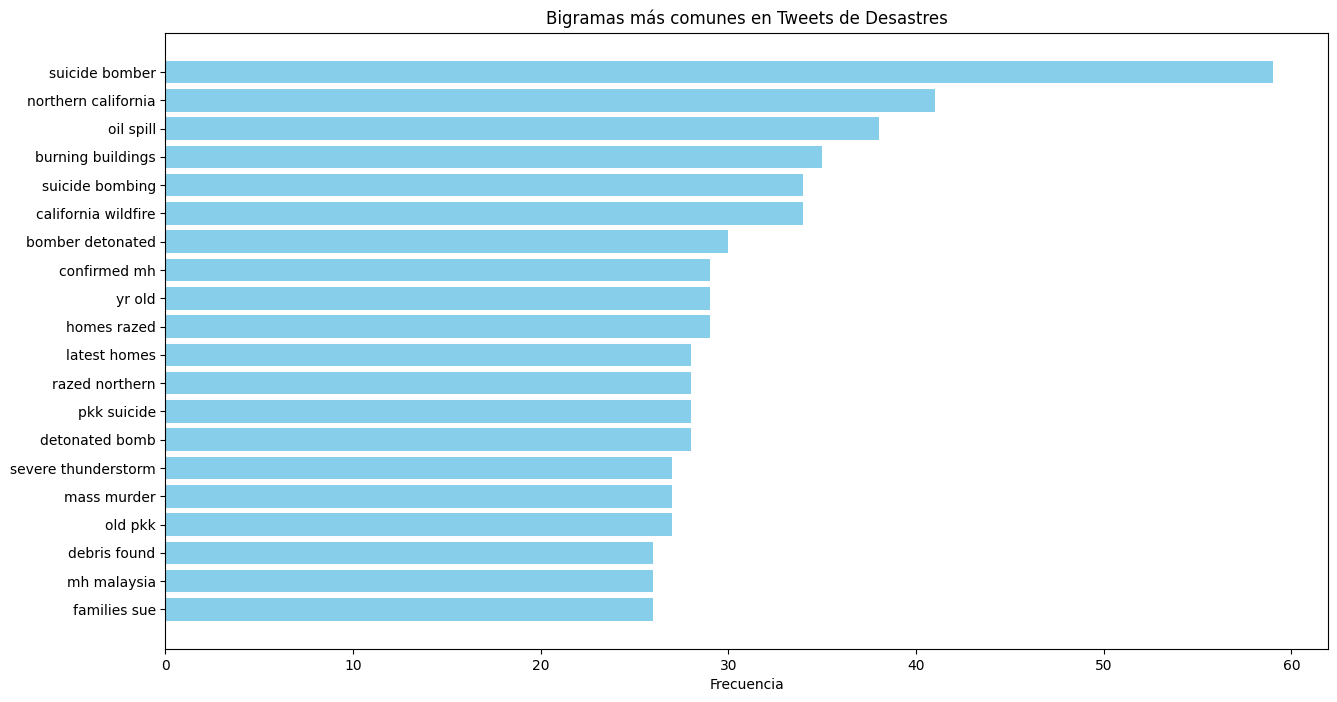

In [9]:
import matplotlib.pyplot as plt

def plot_ngrams(ngram_freq, title, n=20):
    # Obtener los n n-gramas más comunes
    common_ngrams = ngram_freq.most_common(n)
    
    # Separar n-gramas y sus frecuencias
    ngrams, counts = zip(*common_ngrams)
    ngrams = [" ".join(ng) for ng in ngrams]  # Convertir a cadena para el eje X

    # Crear el gráfico de barras
    plt.figure(figsize=(15, 8))
    plt.barh(ngrams, counts, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invertir el eje y para que el n-grama más común esté arriba
    plt.show()

# Ejemplo de uso:
plot_ngrams(disaster_bigram_freq, 'Bigramas más comunes en Tweets de Desastres')

In [10]:
from nltk.util import trigrams

def get_trigram_frequency(texts):
    all_trigrams = []
    for text in texts:
        tweet_trigrams = list(trigrams(text.split()))
        all_trigrams.extend(tweet_trigrams)
    return Counter(all_trigrams)

# Ejemplo de uso:
disaster_trigram_freq = get_trigram_frequency(disaster_tweets)
non_disaster_trigram_freq = get_trigram_frequency(non_disaster_tweets)

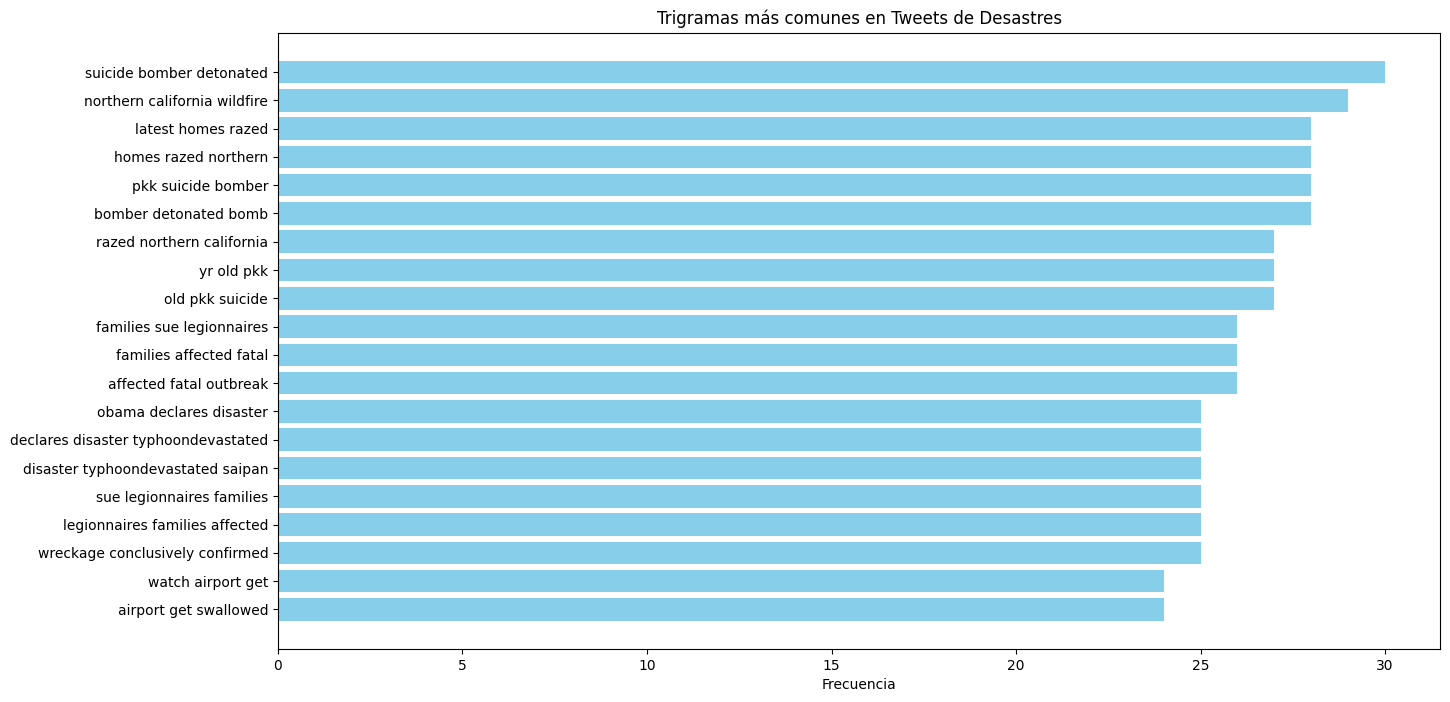

In [11]:
plot_ngrams(disaster_trigram_freq, 'Trigramas más comunes en Tweets de Desastres')

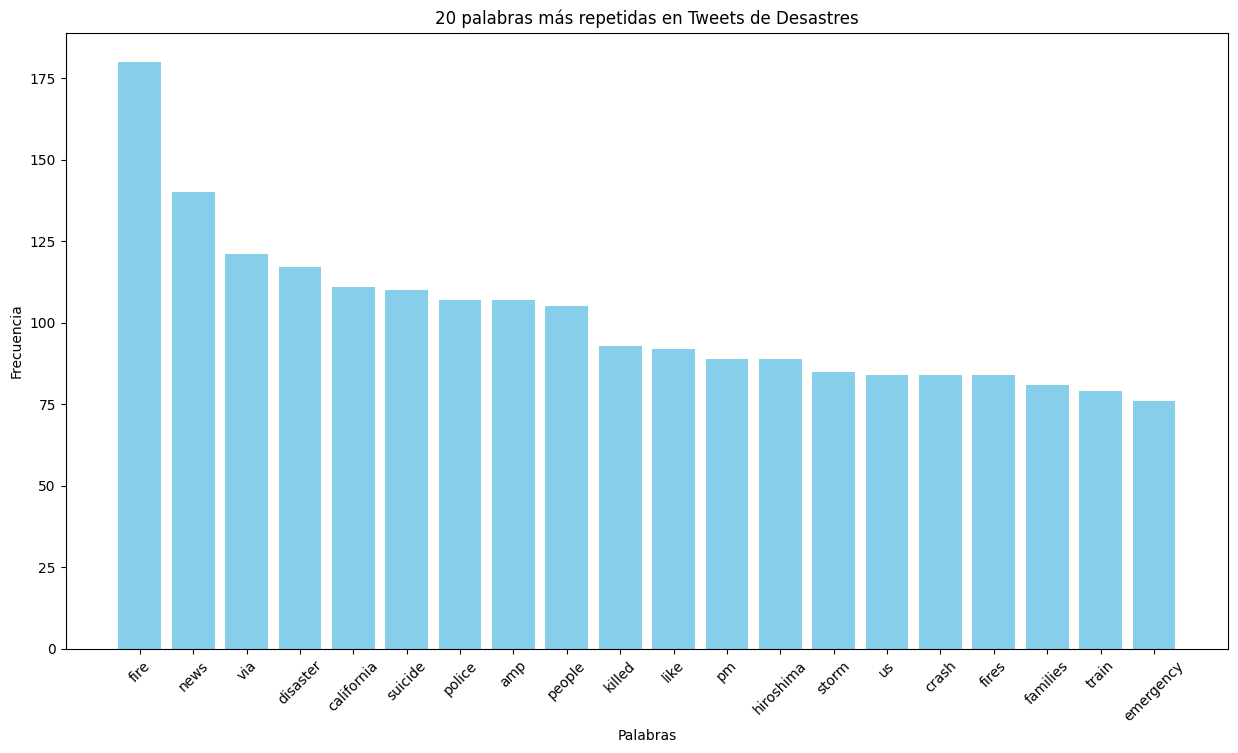

In [12]:
def plot_histogram(word_freq, title, n=20):
    common_words = word_freq.most_common(n)
    words, counts = zip(*common_words)
    plt.figure(figsize=(15, 8))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_histogram(disaster_word_freq, '20 palabras más repetidas en Tweets de Desastres')

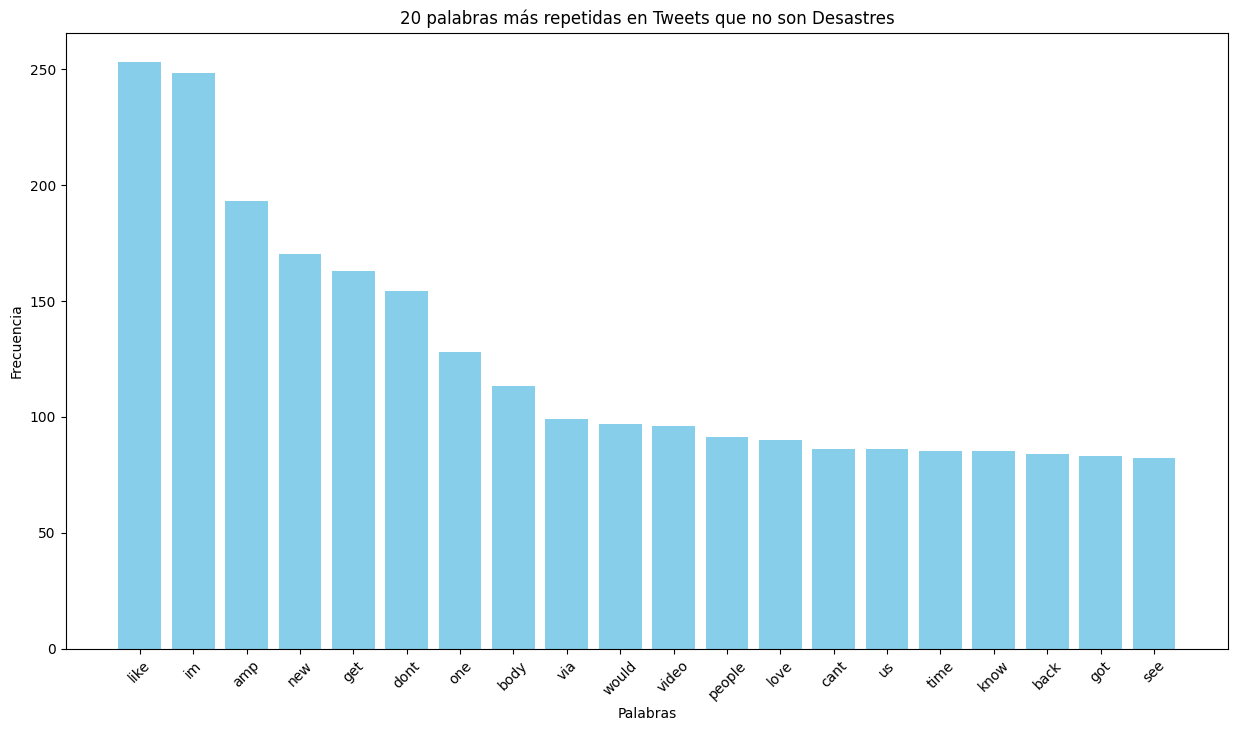

In [13]:
plot_histogram(non_disaster_word_freq, '20 palabras más repetidas en Tweets que no son Desastres')

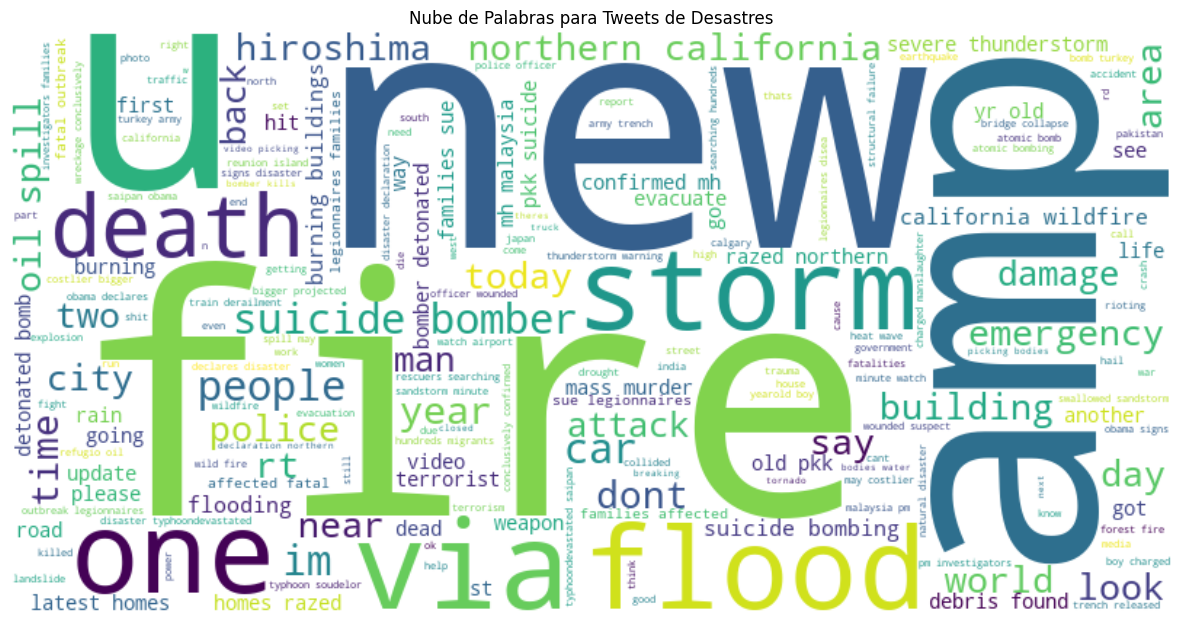

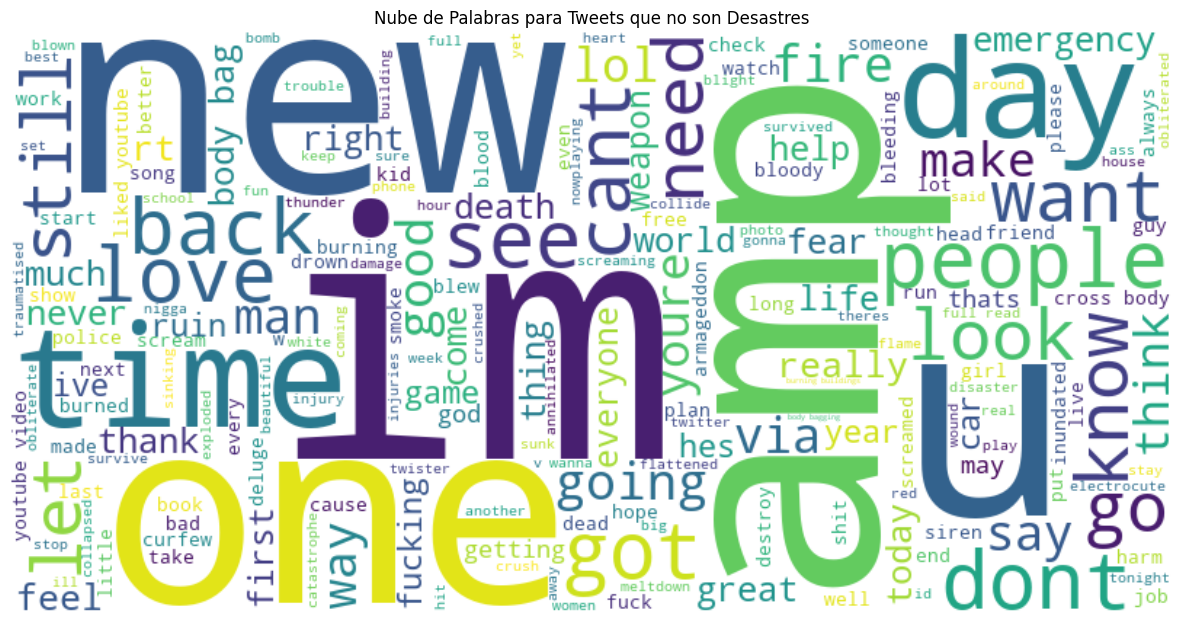

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(' '.join(disaster_tweets), 'Nube de Palabras para Tweets de Desastres')
plot_wordcloud(' '.join(non_disaster_tweets), 'Nube de Palabras para Tweets que no son Desastres')

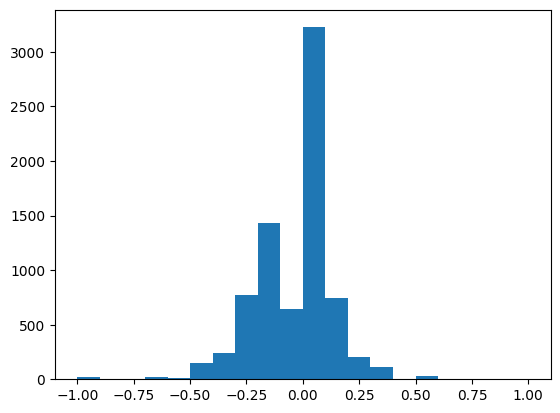

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def categorize_word_vader(word):
    scores = analyzer.polarity_scores(word)
    if scores['compound'] >= 0.05:
        return "positive"
    elif scores['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"
    
for tweet in data['text']:
    classification = []
    for word in tweet.split(" "):
        classi = categorize_word_vader(word)
        classification.append(classi)
    negative = classification.count("negative")
    positive = classification.count("positive")
    total = len(classification)
    polarity = (positive - negative) / total
    # if polarity >= 0.05:
    #     sentiment = "positive"
    # elif polarity <= -0.05:
    #     sentiment = "negative"
    # else:
    #     sentiment = "neutral"
    
    data.loc[data['text'] == tweet, 'sentiment'] = polarity

plt.hist(data['sentiment'], bins=20)
plt.show()





In [18]:
negative_tweets = data.nsmallest(10, 'sentiment')[['text', 'target', 'sentiment']]
print(negative_tweets)

                text  target  sentiment
20        ridiculous       0       -1.0
90          accident       0       -1.0
481   anxiety attack       0       -1.0
1882         crushed       0       -1.0
1886         crushed       0       -1.0
3667        fatality       0       -1.0
3670        fatality       0       -1.0
3674        fatality       0       -1.0
3688        fatality       1       -1.0
3696        fatality       0       -1.0


In [20]:
positive_tweets = data.nlargest(10, 'sentiment')[['text', 'target', 'sentiment']]
print(positive_tweets)

                               text  target  sentiment
2727                       good lol       0   1.000000
6140          super sweet beautiful       0   1.000000
6975                         energy       0   1.000000
6155  save save save heavydirtysoul       0   0.750000
645                shayoly yes love       0   0.666667
4496        guyreginald lol welcome       0   0.666667
4758       benjidevos thanks thanks       0   0.666667
5570          want rainstorm please       0   0.666667
6536     taaylordarr thank survived       0   0.666667
4931   real heroes rip brave hearts       0   0.600000


In [22]:
avg_sentiment_per_category = data.groupby("target")["sentiment"].mean()
print(avg_sentiment_per_category)


target
0   -0.021476
1   -0.076841
Name: sentiment, dtype: float64


In [23]:
if avg_sentiment_per_category[1] < avg_sentiment_per_category[0]:
    print("Los tweets que hablan de un desastre real son, en promedio, más negativos que los que no hablan de un desastre real.")
else:
    print("Los tweets que no hablan de un desastre real son, en promedio, más negativos o tienen un sentimiento similar a los tweets que hablan de un desastre real.")


Los tweets que hablan de un desastre real son, en promedio, más negativos que los que no hablan de un desastre real.


In [ ]:
data['negativity'] = data['sentiment_score'] * -1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.3, random_state=42)

# Vectorizar los tweets usando TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

accuracy = accuracy_score(y_test, clf.predict(X_test_tfidf))
accuracy

In [ ]:
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=X_train.index)
X_train_tfidf_df['negativity'] = data.loc[X_train.index, 'negativity']

X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=X_test.index)
X_test_tfidf_df['negativity'] = data.loc[X_test.index, 'negativity']
